# Kuggle_9기_3주차_과제_회귀진단

*회귀분석은 머신러닝, 딥러닝의 근간입니다. 지금 회귀분석 열심히 해두면 데이터 분석의 전반적인 과정과 이해력이 늘 거에요. 회귀분석을 수강하지 않은 사람들에게는 어려울 수 있어도 지금 해두면 나중에 정말 편해집니다. 회귀분석을 수강한 사람에게도 이해를 높이는데 도움이 될 것이라 믿습니다.*

또한, 앞으로도 여러 머신러닝 기법들을 배울텐데, 어떤 모델을 어떤 상황에서 어떻게 써야하는 지에 대해 생각해보시는 것을 추천드립니다. 

단순히, 결과 지표만 높다고 해당 모델을 선택하기만 하면, 좋은 데이터 분석가가 될 수 없어요! 해당 모델을 왜 선택 했는지 설명할 수 있고 어떤 과정으로 작동하는 지 알고 있어야 합니다.

##### 답지는 끝까지 해보고 봐보세요!

### 목표

#### 이번 과제의 목표는 다음과 같습니다

1. 선형 회귀 모델 구축
2. 회귀 진단을 통한 모델 평가 및 개선

# 데이터셋

Boston Housing dataset을 사용합니다.

## 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF 모듈
import statsmodels.api as sm #쿡의 거리 위한 모듈
from statsmodels.stats.stattools import durbin_watson #더빈-왓슨,
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso #릿지, 라쏘
%matplotlib inline

# 1. 데이터 로드 및 탐색 (Exploratory Data Analysis)

## 보스턴 데이터 로드 

In [2]:
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
df = pd.read_csv(파일경로)

## 데이터 확인 

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.to_csv('boston_df.csv')

### Problem1. 각 feature들의 분포를 확인하세요

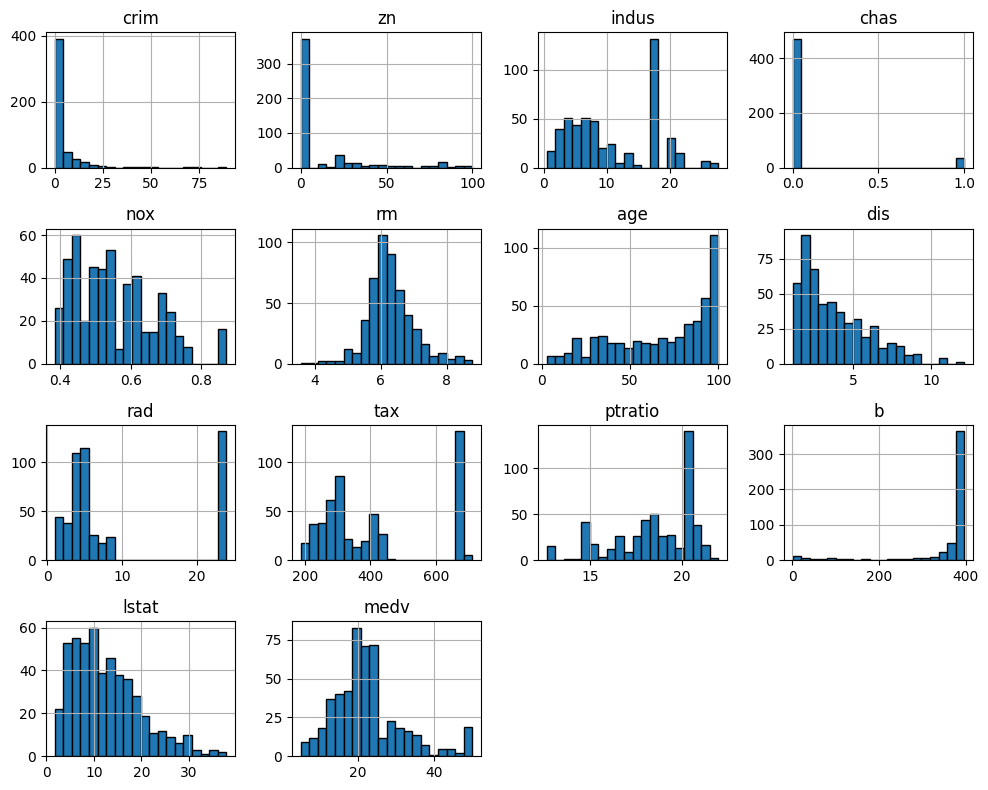

In [4]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

### Problem2. 각 feature와 target 변수 사이의 관계가 선형인지 비선형인지 확인하세요.



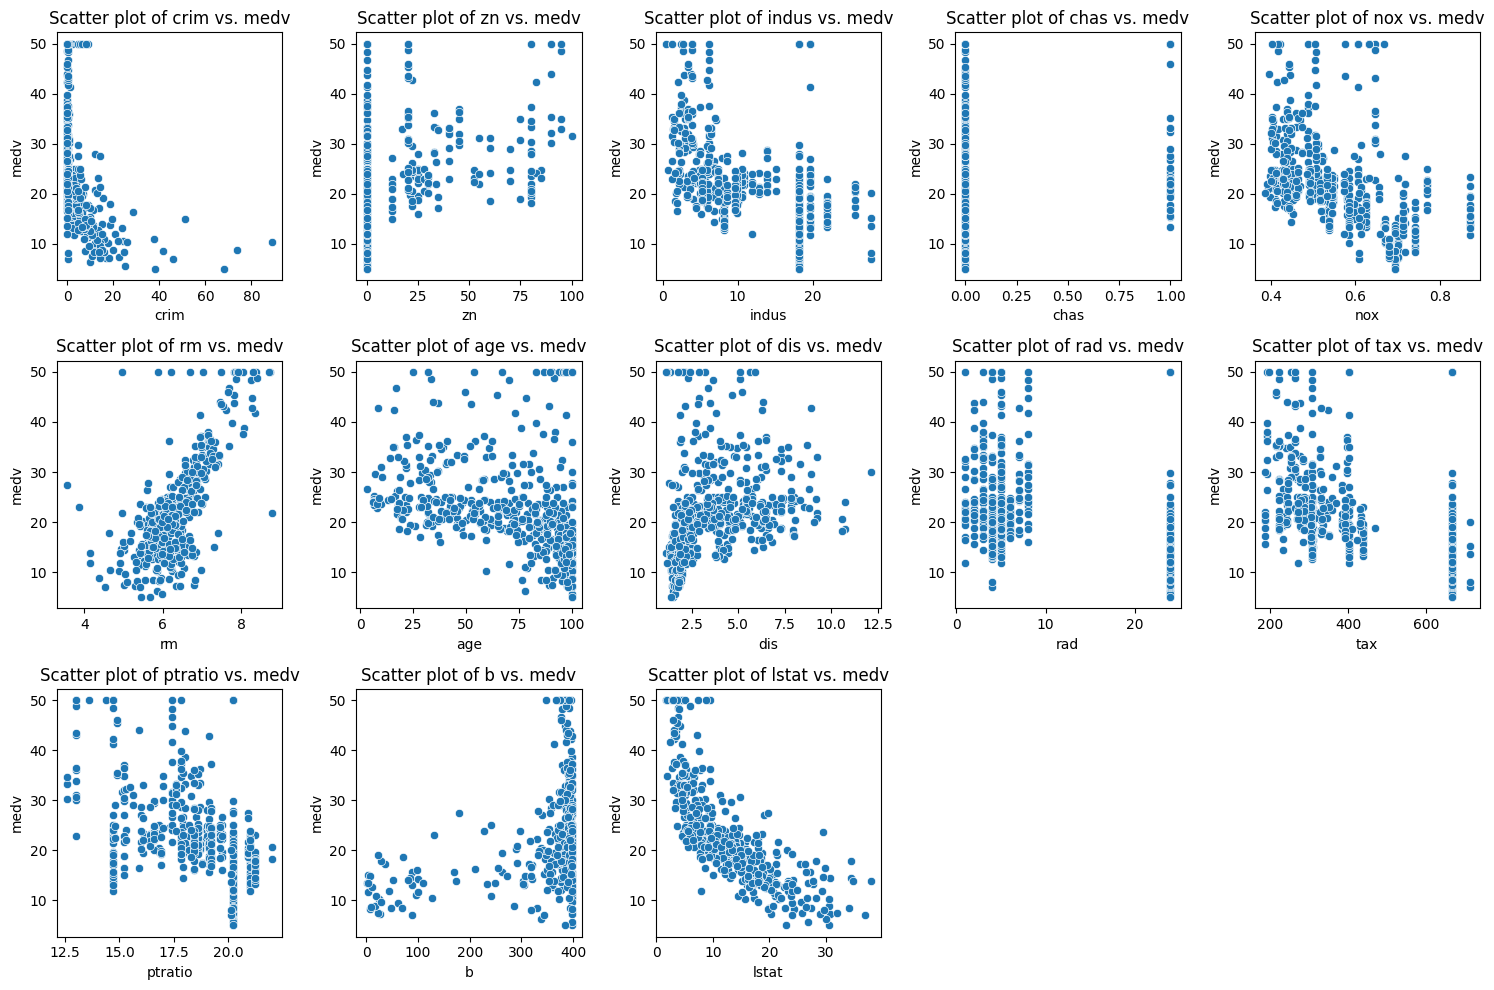

In [7]:
# 산점도 그리기
plt.figure(figsize=(15, 10))
features = df.columns[:-1]  # 마지막 column이 'medv' (target 변수)이므로 제외

for i, col in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.scatterplot(data=df, x=col, y='medv')
    plt.title(f"Scatter plot of {col} vs. medv")
    plt.tight_layout()


In [10]:
correlation = df.corr()
target_correlation = correlation['medv'].drop('medv')  # 'medv'와의 상관계수만 추출
target_correlation.sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
Name: medv, dtype: float64

> `crim`, `indus`, `nox`, `age`, `rad`, `tax`, `ptratio`, `lstat`: 해당 column은  `medv`와 음의 상관관계를 보입니다. 특히 lstat은 -0.737로 가장 강한 음의 상관관계를 보입니다.

> `zn`, `chas`, `rm`, `dis`, `b`: 해당 column은 `medv와` 양의 상관관계를 보입니다. 여기서 `rm`은 0.695로 가장 강한 양의 상관관계를 보입니다.

### Problem3. 만약 비선형인 경우, 적절한 변환(예: 로그변환)을 통해 선형성을 가질 수 있도록 변경하세요.

> `crim`, `dis`, `lstat` 에 대해서 로그변환을 통해 더 명확한 선형관계를 갖도록 함

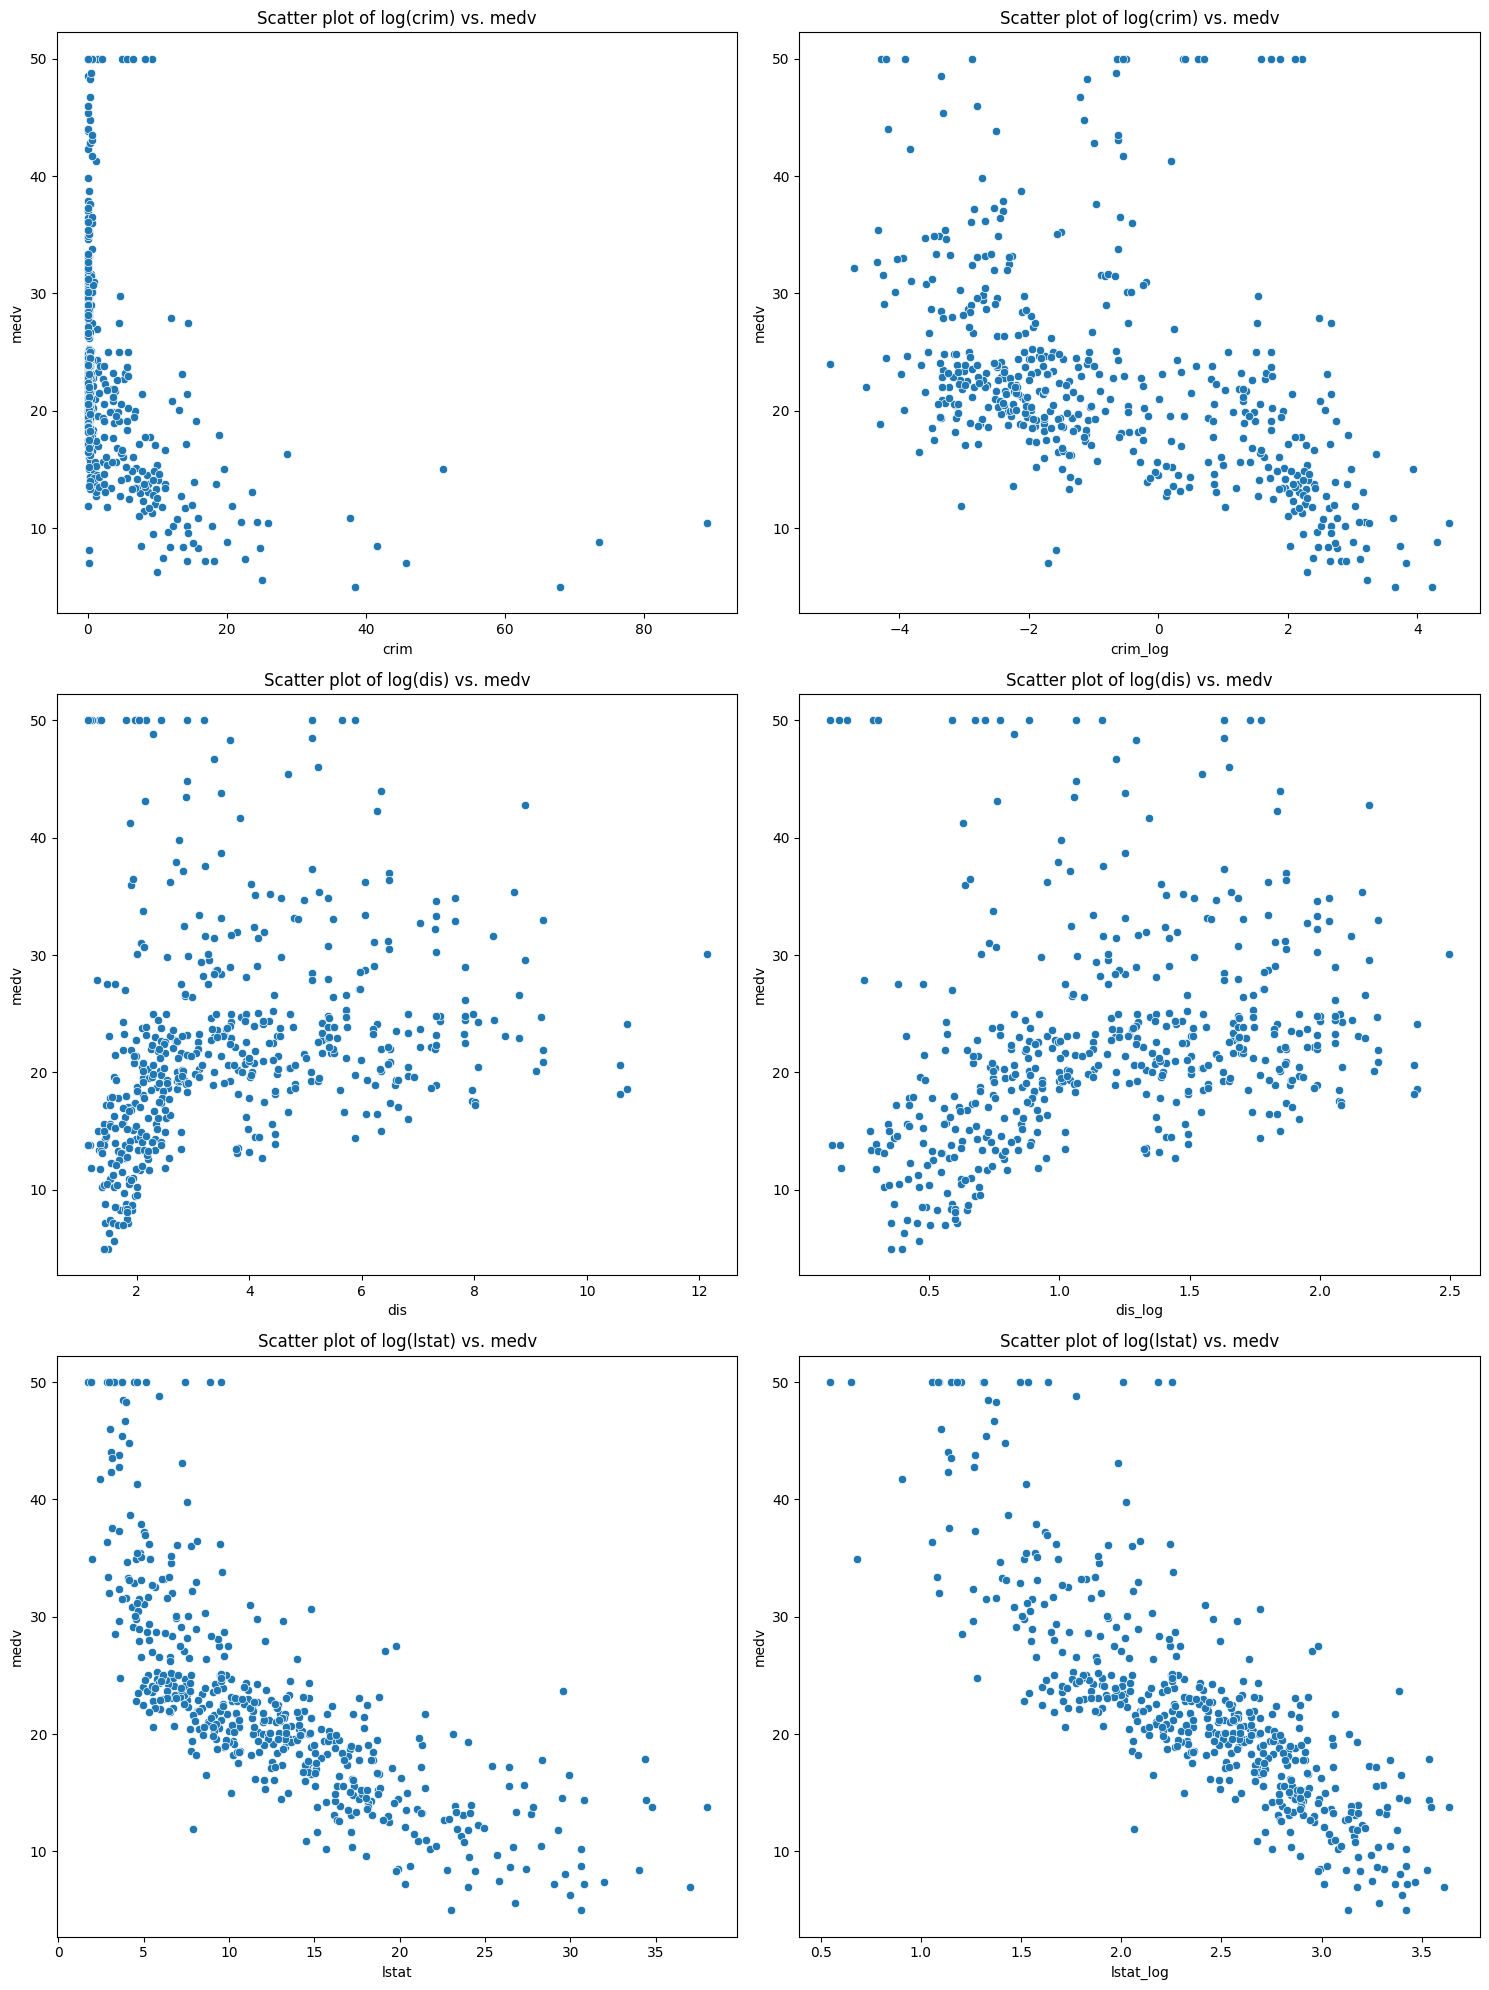

In [24]:
log_features = ['crim', 'dis', 'lstat']

for col in log_features:
    df[col + '_log'] = np.log(df[col])

plt.figure(figsize=(15,20))

for i, col in enumerate(log_features):
    plt.subplot(3,2,2*i+1)
    sns.scatterplot(data=df, x=col, y='medv')
    plt.title(f"Scatter plot of log({col}) vs. medv")
    
    plt.subplot(3,2,2*i+2)
    sns.scatterplot(data=df, x=col + '_log', y='medv')
    plt.title(f"Scatter plot of log({col}) vs. medv")

plt.tight_layout()
plt.show()


In [25]:
df = df.drop(log_features, axis=1)

# 2. 선형회귀모델 구축

### Problem4. Scikit-learn 라이브러리를 사용하여 선형회귀모델을 학습시켜 보세요.

In [27]:
X = df.drop('medv', axis=1)  
y = df['medv'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print(f'MSE: {mse}')

MSE: 18.595436134272216


### Problem5. 교차 검증(cross-validation)을 통해 모델의 일반화 성능을 평가해 보세요.

In [28]:
model = LinearRegression()


scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')


mse_scores = -scores

print(f'Val MSE: {mse_scores.mean()}')

Val MSE: 27.64319684694275


# 3. 회귀진단

## 3.1 잔차 분석

### Problem6. 잔차(residual)에 대한 히스토그램과 QQ plot을 그려보세요.

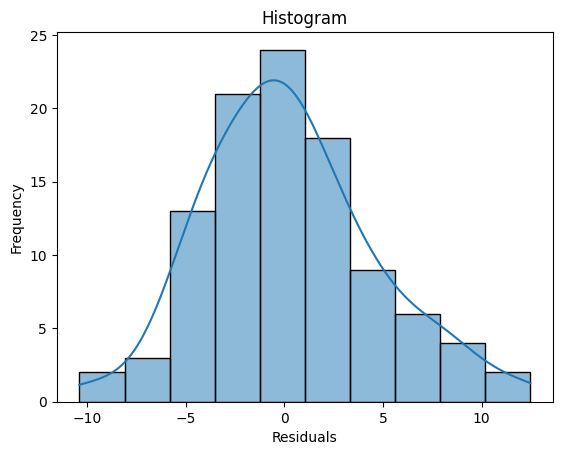

In [30]:
# 핵심 포인트: 왜 지금 이 과정을 거치고 있는 것일까요? 답 해보세요
# 잔차 계산
residuals = y_test - y_pred

# 히스토그램 그리기
sns.histplot(residuals, kde=True)
plt.title('Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

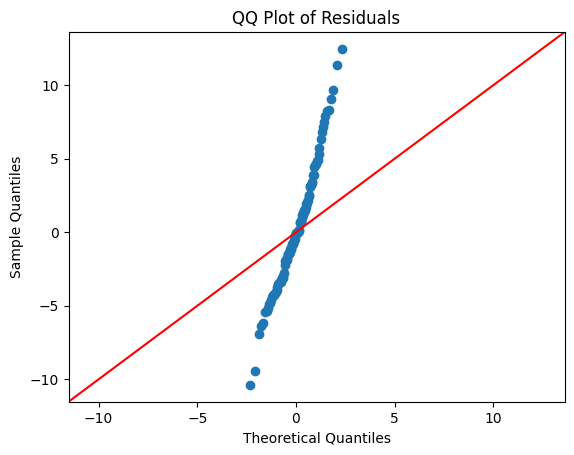

In [32]:
sm.qqplot(residuals, line='45') # line='45' 옵션으로 y=x 직선 추가 
plt.title('QQ Plot of Residuals')
plt.show()

### Problem7. 잔차와 예측값 사이의 관계를 살펴보기 위해 scatter plot도 그려보세요.

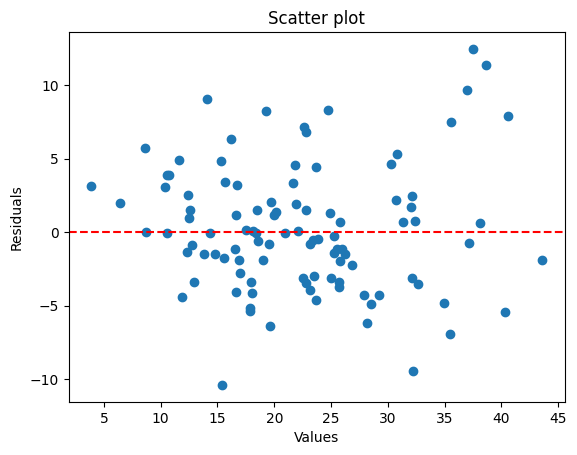

In [33]:
plt.scatter(y_pred, residuals)
plt.xlabel('Values')
plt.ylabel('Residuals')
plt.title('Scatter plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## 3.2 이상치 탐지 (Outlier Detection)

### Problem8. Cook's Distance 등 이상치 탐지 방법들을 활용하여 이상치(outliers)를 찾아내고, 해당 관측치가 모델에 어떤 영향을 미치는지 분석해 보세요.

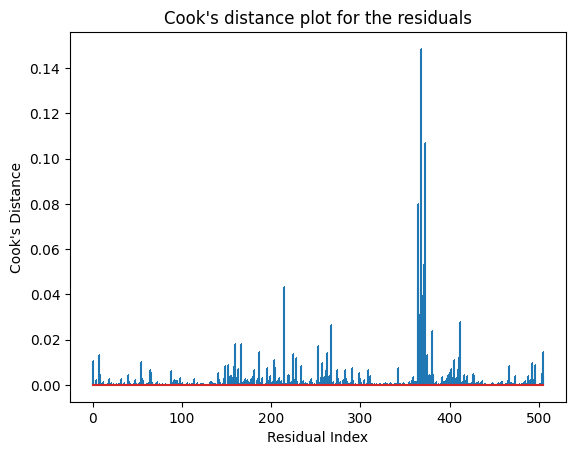

In [34]:
# Cook' statsmodels 라이브러리를 사용해야합니다. 해당 라이브러리를 사용해서 다시 모델 적합하시길 바랍니다. 

model = sm.OLS(y, sm.add_constant(X))
result = model.fit()

influence = result.get_influence()

(c, p) = influence.cooks_distance

plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's distance plot for the residuals")
plt.xlabel("Residual Index")
plt.ylabel("Cook's Distance")
plt.show()

## 3.3 잔차의 독립성 검정

### Problem9. Durbin-Watson 통계량 등으로 잔차의 독립성을 검정하세요.

In [35]:
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic:.3f}')

Durbin-Watson statistic: 2.362


### Problem10. 시간에 따른 자기상관(autocorrelation) 문제가 있는 경우 이를 해결하는 방법 제시해 보세요.

### 시차 차분 (Lagged Differencing):

> 시차 차분은 연속된 관측치 간의 차이를 계산하는 것입니다. 이 방법은 특히 트렌드나 계절성이 있는 데이터에서 유용합니다. 예를 들어, 

### 이동 평균 제거:

> 데이터에서 장기 트렌드를 제거하기 위해 이동 평균을 사용할 수 있습니다. 이후 원래의 시계열 데이터에서 이동 평균을 빼서 시계열 데이터를 안정화시킬 수 있습니다.

### 시계열 분해 (Decomposition):

> 시계열 분해는 시계열 데이터를 여러 구성 요소 (트렌드, 계절성, 잔차)로 분해하는 것입니다. 이를 통해 각 구성 요소를 개별적으로 분석하고 모델링할 수 있습니다.

# 3.4 다중공선성 진단 (Multicollinearity Diagnostics)

### Problem11. VIF(Variance Inflation Factor)등으로 다중공선성 문제 여부를 판단하고 다중공선성이 어떤 가정과 연관이 있는지 설명하세요

In [36]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for idx, vif_value in enumerate(vif):
    print(f'{X.columns[idx]:<10}: {vif_value:.3f}')

zn        : 2.585
indus     : 14.798
chas      : 1.154
nox       : 85.177
rm        : 86.398
age       : 23.592
rad       : 20.911
tax       : 61.337
ptratio   : 101.278
b         : 20.617
crim_log  : 8.805
dis_log   : 25.297
lstat_log : 45.089


### Problem12. 다중공선성 문제를 해결할 수 있는 방안은?

### 변수 제거:

> 상관계수, VIF (Variance Inflation Factor) 등의 지표를 사용하여 다중공선성이 높은 변수들을 식별하고, 이 중 일부 변수를 제거합니다.

### 주성분 회귀 (Principal Component Regression, PCR):

> 주성분 분석 (PCA)을 사용하여 독립 변수들의 선형 조합으로 새로운 변수들 (주성분)을 생성하고, 이 주성분들로 회귀 분석을 수행합니다.

### 릿지 회귀 (Ridge Regression):

> 회귀 계수의 크기에 페널티를 부과하는 정규화 방법입니다. 릿지 회귀는 계수의 크기를 축소하여 다중공선성 문제를 완화시킵니다.

### 라쏘 회귀 (Lasso Regression):

회귀 계수의 절대값에 페널티를 부과하는 정규화 방법입니다. 라쏘 회귀는 일부 변수의 계수를 정확히 0으로 만들어 변수 선택의 효과를 가집니다.

# 4. 정규화 회귀 모델 구축 (Ridge, Lasso)

### Problem13. Ridge와 Lasso 회귀모델을 학습시켜 보세요.

In [38]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f'Ridge MSE: {mean_squared_error(y_test, y_pred_ridge)}')

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print(f'Lasso MSE: {mean_squared_error(y_test, y_pred_lasso)}')

Ridge MSE: 18.80686984458019
Lasso MSE: 25.19650394463682


### Problem14. 각 모델의 특징을 이해하고 어떤 상황에서 어떤 모델을 사용하는 것이 좋은지 설명하세요.

> 릿지 회귀 (Ridge Regression)와 라쏘 회귀 (Lasso Regression)는 둘 다 선형 회귀에 정규화 항을 추가하여 모델의 과적합을 방지하고 다중공선성 문제를 완화하는 방법입니다

## 릿지 회귀 (Ridge Regression)

### 특징:
> L2 정규화 (L2 penalty)를 사용합니다.
> 모든 독립 변수에 대한 회귀 계수를 축소하지만, 완전히 0으로 만들지는 않습니다.
> β 계수에 제곱 값을 기반으로 페널티를 부과합니다.
### 적합한 상황:
> 변수들 간의 높은 상관관계 (다중공선성)가 있는 경우.
> 모든 특성이 예측 변수로서 중요할 때 사용하기 좋습니다.
> 라쏘 회귀 (Lasso Regression)
### 특징:
> L1 정규화 (L1 penalty)를 사용합니다.
> 일부 회귀 계수를 완전히 0으로 만들 수 있습니다. 이는 변수 선택의 효과를 가지게 됩니다.
> β 계수에 절대값을 기반으로 페널티를 부과합니다.
### 적합한 상황:
> 변수의 수가 많고, 그 중 일부 변수만 실제로 중요한 경우.
> 변수 선택이 필요한 경우 (즉, 중요하지 않은 변수들을 모델에서 제외하려는 경우).
> 데이터의 차원을 줄이고 싶을 때.

## 라쏘 vs 릿지:
> 변수의 수가 많고, 그 중 일부 변수만 중요하다고 생각되면 라쏘 회귀를 사용하여 불필요한 변수를 제거할 수 있습니다.
> 반면, 모든 변수가 중요하다고 생각되면 릿지 회귀를 사용하여 변수들의 회귀 계수를 축소하는 방향으로 모델을 정규화할 수 있습니다.
